In [16]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [17]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/"
print("data path: ", data_path)

level: mdanalysis & tutorial name: mdanalysis-tutorial
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/mdanalysis/


In [18]:
timestep = 0.0005 * 1000 # actual time in ps between 2 recorded frames
number = np.loadtxt(data_path + "number_bond_vs_time.dat")
frame, number = number.T
time = timestep * frame # ps

In [19]:
length = np.loadtxt(data_path + "length_bond_vs_time.dat")
_, length = length.T

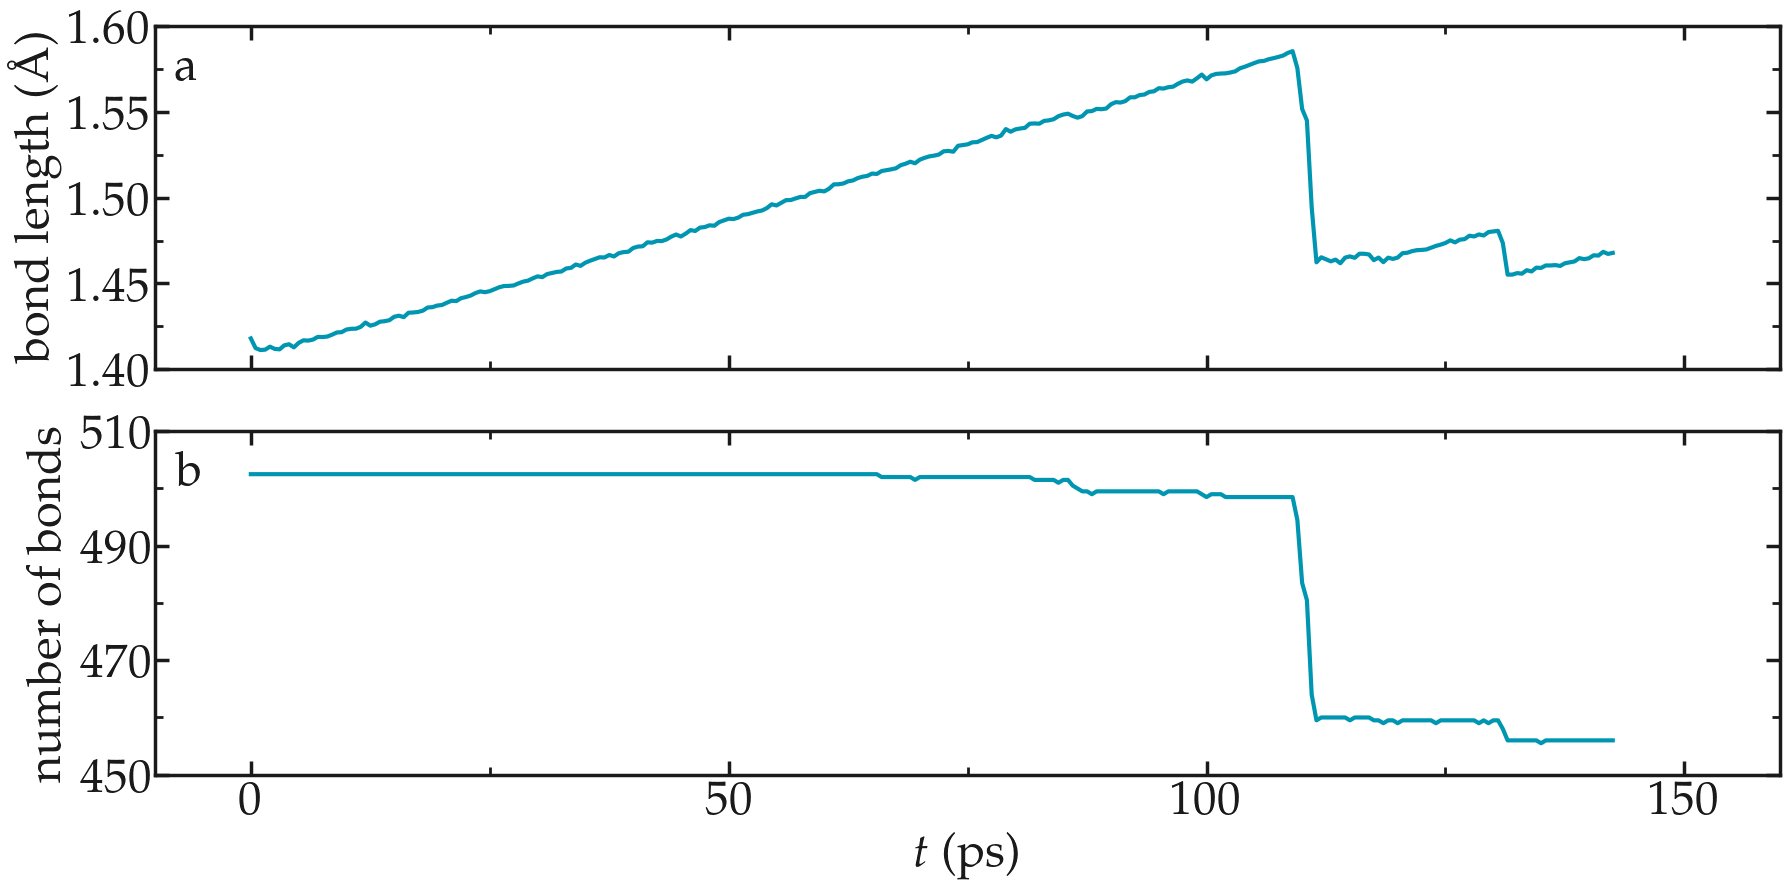

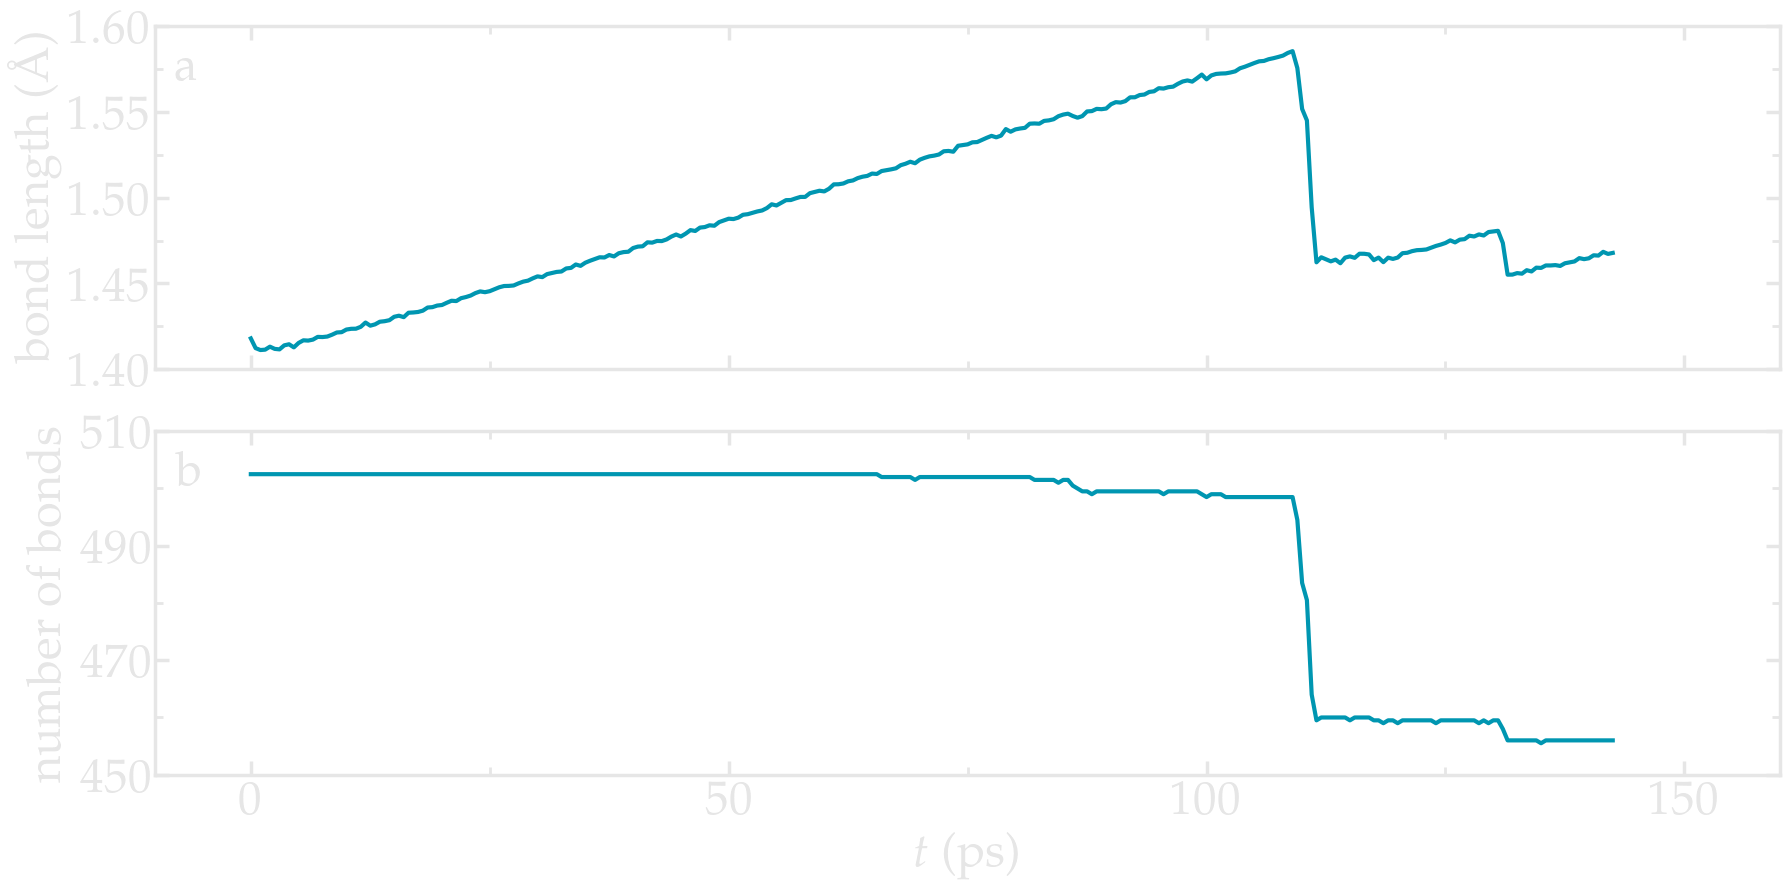

In [20]:
filename = "bond"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,9))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time, length, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], None, r'bond length (\AA)', legend=False, axis_color=mygray, cancel_x=True)
    set_boundaries(plt, x_ticks=np.arange(0, 160, 50), x_boundaries=(-10, 160), y_ticks=np.arange(1.4, 1.6, 0.05))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time, number, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], r'$t$ (ps)', r'number of bonds', legend=False, axis_color=mygray)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    set_boundaries(plt, y_ticks=np.arange(450, 530, 20), x_ticks=np.arange(0, 160, 50), x_boundaries=(-10, 160))
    save_figure(plt, fig, mode, git_path, path_figures, filename)